<a href="https://colab.research.google.com/github/AlexanderF048/GOIT_DS/blob/main/HW_11_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import imdb

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Bidirectional

### **Load Data**

---



In [14]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 300  # обмеження кількості слів в тексті
batch_size = 32
validation_split = 0.3
EPOCH = 5

In [15]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [16]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   

In [17]:
y_train[0]

1

In [18]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in input_train[0]])
print(decoded_review)

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the st

### **RNN**

---



In [19]:
model = Sequential([

    Embedding(max_features, 32),# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                               # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
    SimpleRNN(32),# Додавання SimpleRNN шару з 32 вузлами
                  #SimpleRNN(50, dropout=0.2, recurrent_dropout=0.2
                  # Параметр: кількість вузлів (розмір прихованого стану)
    Dense(1, activation='sigmoid'),# Додавання Dense шару з одним вузлом та активацією sigmoid
                                  # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
    ])

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(input_train, y_train, epochs=EPOCH, batch_size=batch_size, validation_split=validation_split)

Epoch 1/5
547/547 [==============================] - 53s 94ms/step - loss: 0.5402 - acc: 0.7159 - val_loss: 0.6637 - val_acc: 0.7295
Epoch 2/5
547/547 [==============================] - 49s 89ms/step - loss: 0.3473 - acc: 0.8597 - val_loss: 0.4035 - val_acc: 0.8256
Epoch 3/5
547/547 [==============================] - 48s 87ms/step - loss: 0.2900 - acc: 0.8833 - val_loss: 0.4728 - val_acc: 0.7675
Epoch 4/5
547/547 [==============================] - 49s 89ms/step - loss: 0.2404 - acc: 0.9061 - val_loss: 0.3959 - val_acc: 0.8265
Epoch 5/5
547/547 [==============================] - 50s 92ms/step - loss: 0.1933 - acc: 0.9278 - val_loss: 0.4169 - val_acc: 0.8215


In [22]:
score, accur = model.evaluate(input_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accur)

782/782 [==============================] - 15s 19ms/step - loss: 0.4124 - acc: 0.8224
Test score: 0.4123605191707611
Test accuracy: 0.8224400281906128


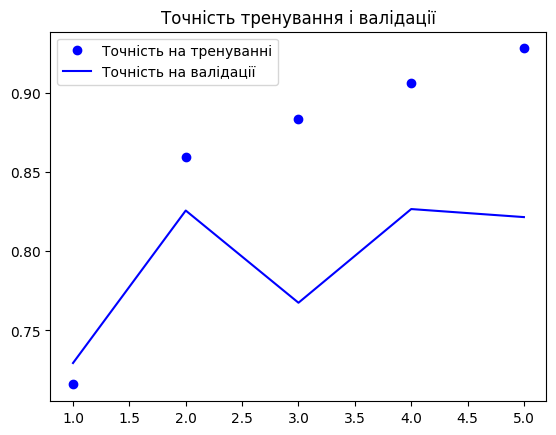

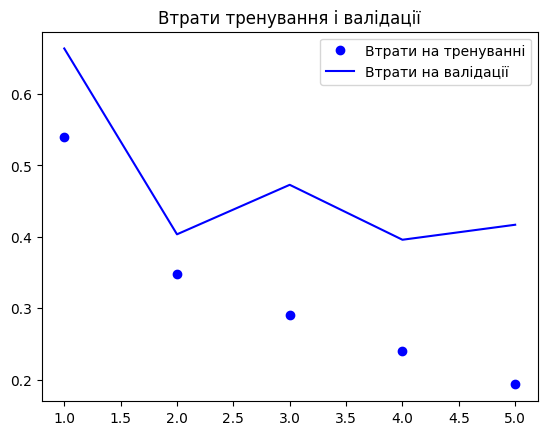

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки



### **GRU**

---



In [24]:
model_GRU = Sequential([

    Embedding(max_features, 32),# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                               # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
    GRU(32),# Додавання SimpleRNN шару з 32 вузлами
                  # Параметр: кількість вузлів (розмір прихованого стану)
    Dense(1, activation='sigmoid'),# Додавання Dense шару з одним вузлом та активацією sigmoid
                                  # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
    ])

In [25]:
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [26]:
history_GRU = model_GRU.fit(input_train, y_train, epochs=EPOCH, batch_size=batch_size, validation_split=validation_split)
print(history_GRU.history.keys())

Epoch 1/5
547/547 [==============================] - 102s 181ms/step - loss: 0.4944 - acc: 0.7402 - val_loss: 0.3545 - val_acc: 0.8540
Epoch 2/5
547/547 [==============================] - 99s 182ms/step - loss: 0.3193 - acc: 0.8753 - val_loss: 0.3204 - val_acc: 0.8651
Epoch 3/5
547/547 [==============================] - 99s 182ms/step - loss: 0.2564 - acc: 0.9023 - val_loss: 0.3191 - val_acc: 0.8757
Epoch 4/5
547/547 [==============================] - 98s 180ms/step - loss: 0.2181 - acc: 0.9189 - val_loss: 0.3085 - val_acc: 0.8779
Epoch 5/5
547/547 [==============================] - 100s 182ms/step - loss: 0.1960 - acc: 0.9275 - val_loss: 0.3010 - val_acc: 0.8797
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [27]:
score, accur = model_GRU.evaluate(input_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accur)

782/782 [==============================] - 26s 33ms/step - loss: 0.3186 - acc: 0.8732
Test score: 0.3186318874359131
Test accuracy: 0.8732399940490723


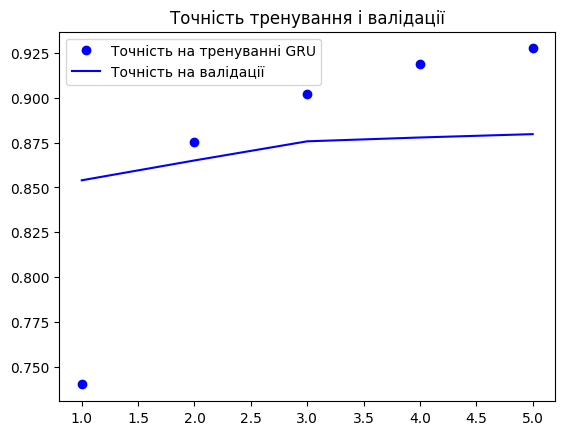

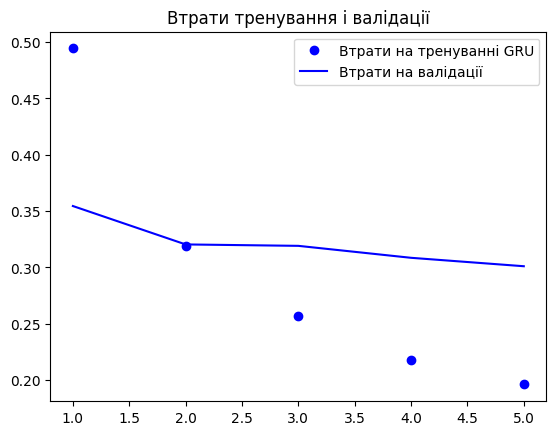

In [28]:
acc = history_GRU.history['acc']
val_acc = history_GRU.history['val_acc']
loss = history_GRU.history['loss']
val_loss = history_GRU.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні GRU')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні GRU')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

### **LSTM**

---



In [29]:
model_LSTM = Sequential([

    Embedding(max_features, 32),# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                               # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
    LSTM(32),# Додавання SimpleRNN шару з 32 вузлами
              # Параметр: кількість вузлів (розмір прихованого стану)
    Dense(1, activation='sigmoid'),# Додавання Dense шару з одним вузлом та активацією sigmoid
                                  # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
    ])

In [30]:
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [31]:
history_LSTM = model_LSTM.fit(input_train, y_train, epochs=EPOCH, batch_size=batch_size, validation_split=validation_split)
print(history_LSTM.history.keys())

Epoch 1/5
547/547 [==============================] - 98s 174ms/step - loss: 0.4638 - acc: 0.7742 - val_loss: 0.3258 - val_acc: 0.8625
Epoch 2/5
547/547 [==============================] - 93s 170ms/step - loss: 0.2853 - acc: 0.8884 - val_loss: 0.2831 - val_acc: 0.8843
Epoch 3/5
547/547 [==============================] - 93s 170ms/step - loss: 0.2328 - acc: 0.9098 - val_loss: 0.2822 - val_acc: 0.8839
Epoch 4/5
547/547 [==============================] - 96s 175ms/step - loss: 0.2047 - acc: 0.9237 - val_loss: 0.2841 - val_acc: 0.8871
Epoch 5/5
547/547 [==============================] - 99s 181ms/step - loss: 0.1822 - acc: 0.9331 - val_loss: 0.3254 - val_acc: 0.8672
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [32]:
score, accur = model_LSTM .evaluate(input_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accur)

782/782 [==============================] - 28s 36ms/step - loss: 0.3448 - acc: 0.8588
Test score: 0.3448086678981781
Test accuracy: 0.8588399887084961


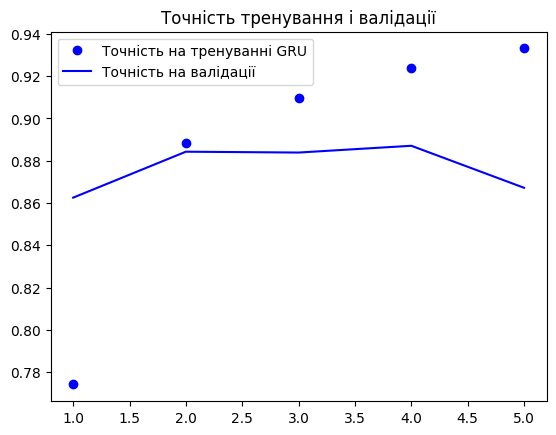

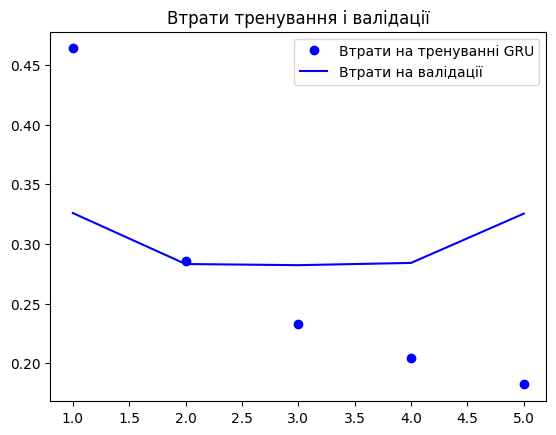

In [33]:
acc = history_LSTM.history['acc']
val_acc = history_LSTM.history['val_acc']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні GRU')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні GRU')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

### **BRNN**

---



In [34]:
model_BRNN = Sequential([

    Embedding(max_features, 32),# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                               # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
    Bidirectional(LSTM(32)),# Додавання SimpleRNN шару з 32 вузлами
                            # Параметр: кількість вузлів (розмір прихованого стану)
    Dense(1, activation='sigmoid'),# Додавання Dense шару з одним вузлом та активацією sigmoid
                                  # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
    ])

In [35]:
model_BRNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_BRNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_BRNN = model_BRNN.fit(input_train, y_train, epochs=EPOCH, batch_size=batch_size, validation_split=validation_split)
print(history_BRNN.history.keys())

Epoch 1/5
547/547 [==============================] - 165s 293ms/step - loss: 0.4793 - acc: 0.7584 - val_loss: 0.3399 - val_acc: 0.8611
Epoch 2/5
547/547 [==============================] - 167s 305ms/step - loss: 0.2913 - acc: 0.8853 - val_loss: 0.3285 - val_acc: 0.8595
Epoch 3/5
547/547 [==============================] - 160s 292ms/step - loss: 0.2390 - acc: 0.9104 - val_loss: 0.2925 - val_acc: 0.8853
Epoch 4/5
547/547 [==============================] - 167s 305ms/step - loss: 0.2083 - acc: 0.9242 - val_loss: 0.2948 - val_acc: 0.8796
Epoch 5/5
547/547 [==============================] - 167s 306ms/step - loss: 0.1886 - acc: 0.9305 - val_loss: 0.3009 - val_acc: 0.8803
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [37]:
score, accur = model_BRNN .evaluate(input_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accur)

782/782 [==============================] - 44s 56ms/step - loss: 0.3268 - acc: 0.8710
Test score: 0.3268022835254669
Test accuracy: 0.8710399866104126


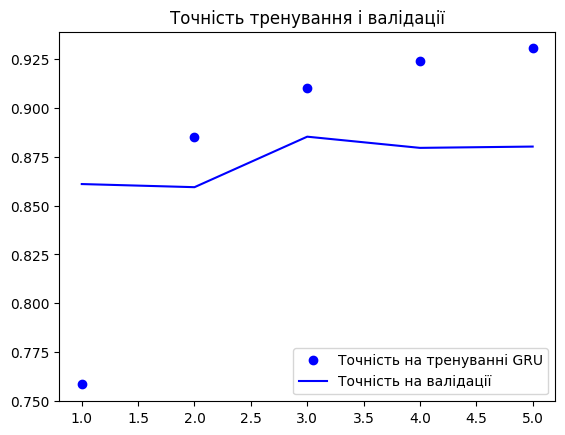

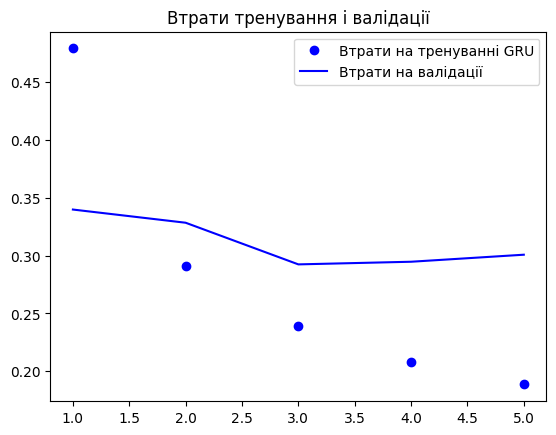

In [38]:
acc = history_BRNN.history['acc']
val_acc = history_BRNN.history['val_acc']
loss = history_BRNN.history['loss']
val_loss = history_BRNN.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні GRU')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні GRU')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

### **DRNN**

---



In [39]:
model_DRNN = Sequential([

    Embedding(max_features, 32),# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                               # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
    Bidirectional(LSTM(32, return_sequences=True)), # Додавання SimpleRNN шару з 32 вузлами
                                                   # Параметр: кількість вузлів (розмір прихованого стану)
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid'),# Додавання Dense шару з одним вузлом та активацією sigmoid
                                  # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
    ])

In [40]:
model_DRNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_DRNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 64)         16640     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361,537
Trainable params: 361,537
Non-trainable params: 0
_________________________________________________________________


In [41]:
history_DRNN = model_DRNN.fit(input_train, y_train, epochs=EPOCH, batch_size=batch_size, validation_split=validation_split)
print(history_DRNN.history.keys())

Epoch 1/5
547/547 [==============================] - 352s 630ms/step - loss: 0.4801 - acc: 0.7551 - val_loss: 0.3853 - val_acc: 0.8380
Epoch 2/5
547/547 [==============================] - 338s 619ms/step - loss: 0.2880 - acc: 0.8851 - val_loss: 0.2980 - val_acc: 0.8855
Epoch 3/5
547/547 [==============================] - 339s 621ms/step - loss: 0.2341 - acc: 0.9111 - val_loss: 0.3169 - val_acc: 0.8844
Epoch 4/5
547/547 [==============================] - 340s 622ms/step - loss: 0.1954 - acc: 0.9294 - val_loss: 0.3229 - val_acc: 0.8779
Epoch 5/5
547/547 [==============================] - 339s 620ms/step - loss: 0.1628 - acc: 0.9445 - val_loss: 0.3638 - val_acc: 0.8669
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [42]:
score, accur = model_DRNN .evaluate(input_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', accur)

782/782 [==============================] - 91s 116ms/step - loss: 0.3742 - acc: 0.8618
Test score: 0.37423524260520935
Test accuracy: 0.8617600202560425


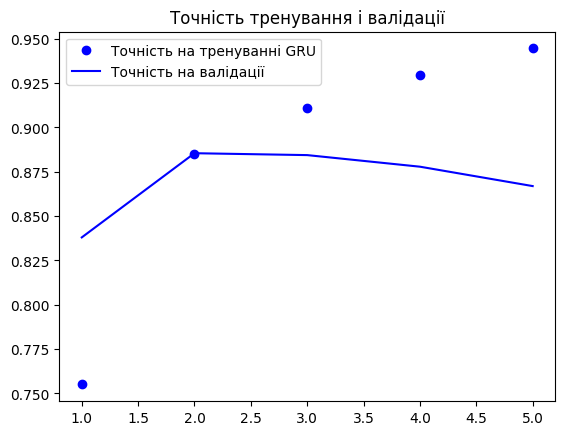

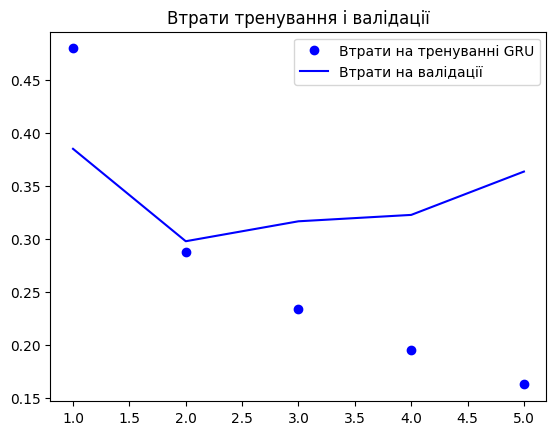

In [43]:
acc = history_DRNN.history['acc']
val_acc = history_DRNN.history['val_acc']
loss = history_DRNN.history['loss']
val_loss = history_DRNN.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні GRU')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні GRU')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

### **SUMMARY**

---



**S-RNN**\
782/782 [==============================] - 15s 19ms/step - loss: 0.4124 - acc: 0.8224\
Test score: 0.4123605191707611\
Test accuracy: 0.8224400281906128\
**GRU**\
782/782 [==============================] - 26s 33ms/step - loss: 0.3186 - acc: 0.8732\
Test score: 0.3186318874359131\
Test accuracy: 0.8732399940490723\
**LSTM**\
782/782 [==============================] - 28s 36ms/step - loss: 0.3448 - acc: 0.8588\
Test score: 0.3448086678981781\
Test accuracy: 0.8588399887084961\
**BRNN**\
782/782 [==============================] - 44s 56ms/step - loss: 0.3268 - acc: 0.8710\
Test score: 0.3268022835254669\
Test accuracy: 0.8710399866104126\
**DRNN**\
782/782 [==============================] - 91s 116ms/step - loss: 0.3742 - acc: 0.8618\
Test score: 0.37423524260520935\
Test accuracy: 0.8617600202560425\

\ При запуске различных архитектур моделей RNN
с использованием одинаковых параметров тенденция улучшения результатов работы наблюдается в модифицированных GRU, LSTM, BRNN, DRNN.
Графики показывают что при корректировке количества эпох их можно повысить, также результат может повысить Dropout.